In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import ReLU,Softmax
from keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# variables uses
train_data_dir='C:/Users/Lenovo/data-Science/image_data/training'
test_data_dir='C:/Users/Lenovo/data-Science/image_data/test'
validation_data_dir='C:/Users/Lenovo/data-Science/image_data/validation'
train_samples=200
validation_samples=50
epochs=10
batch_size=30
img_width=150
img_height=150
input_shape=(img_width,img_height,3)

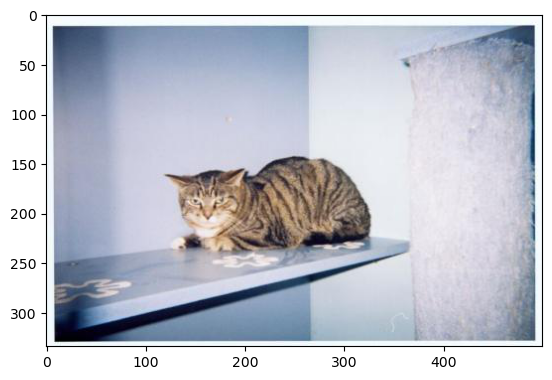

In [4]:
import matplotlib.pyplot as plt
img=plt.imread(f'{train_data_dir}/Cat/2502.jpg')
plt.imshow(img)

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
train_generator=train_datagen.flow_from_directory(
train_data_dir,target_size=(img_width,img_height),batch_size=batch_size)

Found 198 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Cat': 0, 'Dog': 1}

In [8]:
from skimage import io
def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

In [9]:
image_batch,batch=train_generator.next()

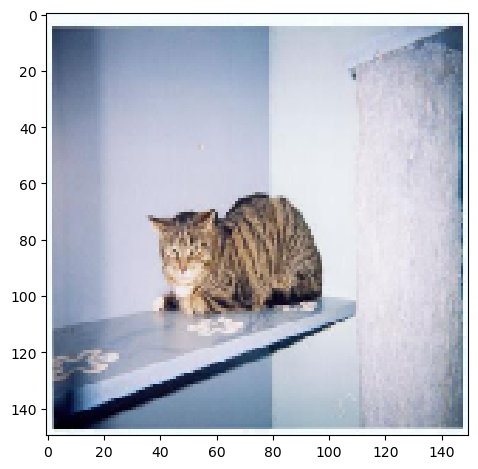

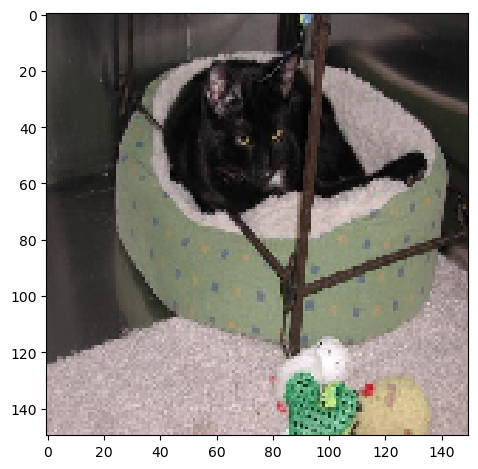

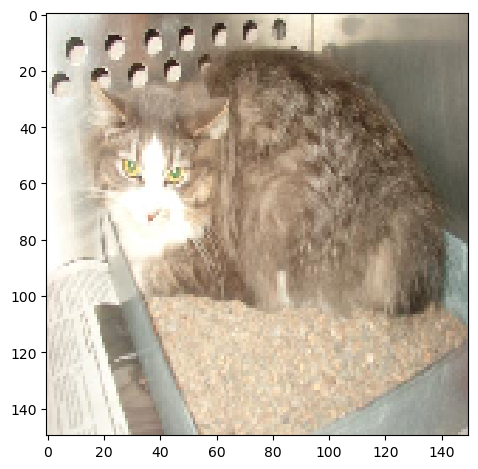

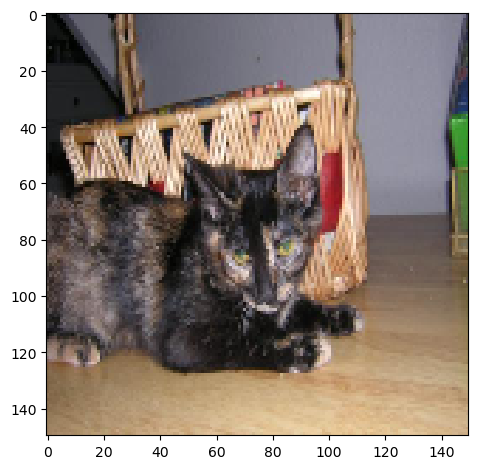

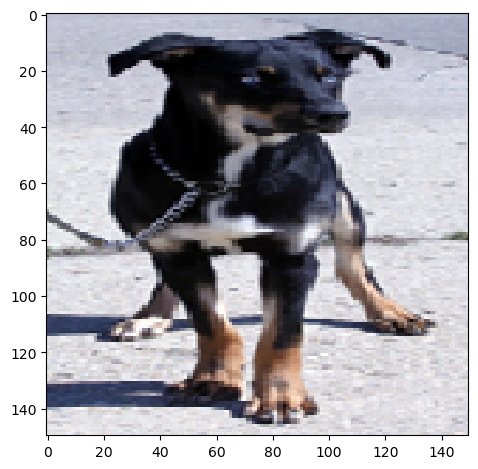

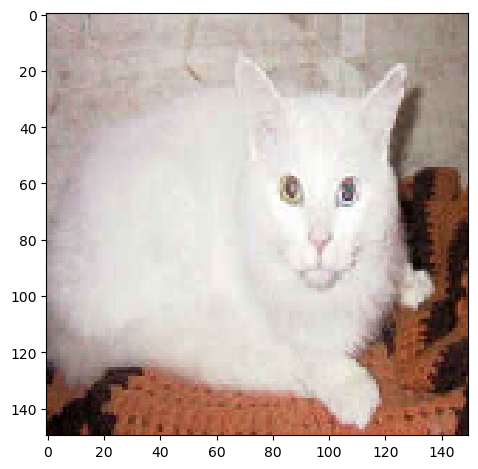

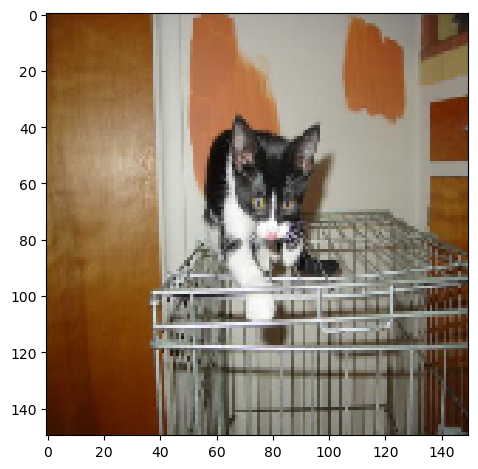

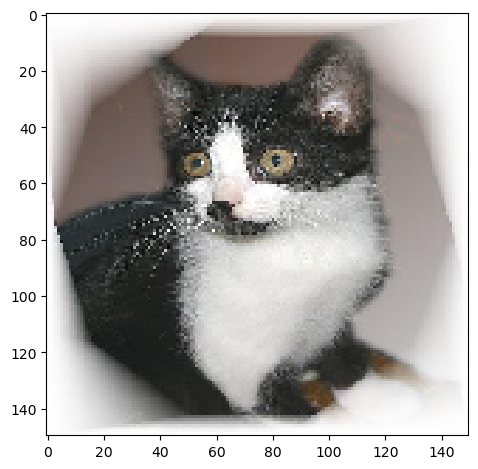

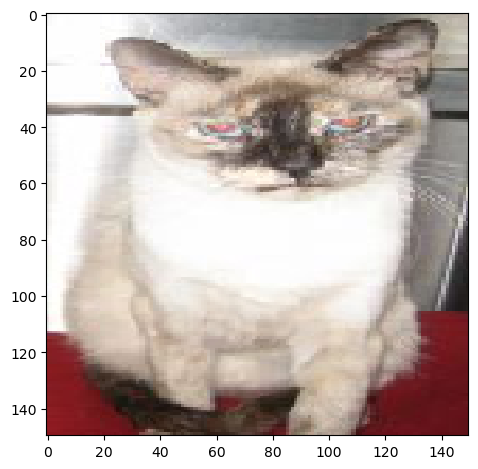

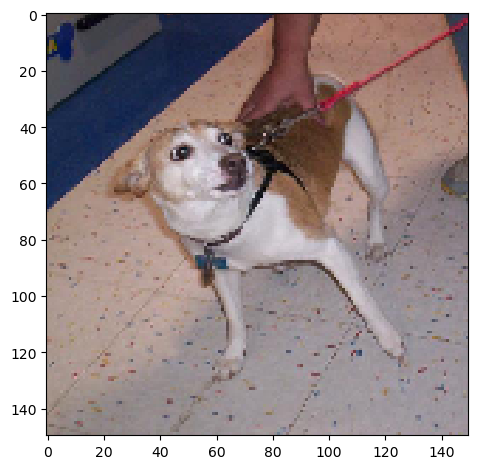

In [10]:
for i in range(0,10):
    image=image_batch[i]
    imshow(image)

## build and train the model

In [11]:
# step 1
model=Sequential()
model.add(Conv2D(32,(3,3),padding = 'same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(MaxPooling2D())

In [12]:
#step 2
model.add(Conv2D(64,(3,3),padding = 'same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(GlobalMaxPooling2D())

In [16]:
#step 3
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [17]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print('model complied')

model complied


In [18]:
print('start training')
model_history=model.fit_generator(train_generator,epochs=10)
print('training finished')

start training
Epoch 1/10
7/7 [==============================] - 4s 446ms/step - loss: 0.7335 - accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 4s 622ms/step - loss: 0.7015 - accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 3s 424ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 4s 518ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 4s 574ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 3s 434ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 4s 516ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 8/10
7/7 [==============================] - 4s 589ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 9/10
7/7 [==============================] - 3s 448ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 10/10
7/7 [==============================] - 4s 607ms/step - loss: 0.6932 - accuracy: 0.5000
trai

In [20]:
from tensorflow.keras.preprocessing import image
for file in files:
    img1 = image.load_img(file, target_size=(64, 64))
    img = image.img_to_array(img1)

NameError: name 'files' is not defined

In [ ]:
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1